## Imports

In [1]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy.linalg as lng # linear algebra from scipy library
from sklearn import preprocessing as preproc # load preprocessing function

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [25]:
prostatePath = 'Prostate.txt'

T = np.loadtxt(prostatePath, delimiter = ' ', skiprows = 1, usecols=[1,2,3,4,5,6,7,8,9])

y = T[:, 0]
X = T[:,1:]

[n, p] = np.shape(X)

#Our chosen normalization centers and normalize the variables of a data matrix to unit length.
# We can use sklearn "Normalizer" to do this, but we must transpose the matrices to act on the variables instead of samples
X_pre = X - np.mean(X,axis=0)
y_pre = y - np.mean(y,axis=0)

normalizer = preproc.Normalizer().fit(X_pre.T)  
X_pre = normalizer.transform(X_pre.T).T

## 1 Perform model selection for ridge regression (for the prostate data set):
> (a) Consider using ridge-regression solutions for the prostate data set. What is a suitable range for the shrinkage parameter $λ$ in which to search for an optimal solution in?

In [26]:
def ridgeMulti(X, _lambda, p, y):
    betas = [np.linalg.inv(X.T@X + lam*np.eye(p))@X.T@y for lam in _lambda]
    return np.array(betas)

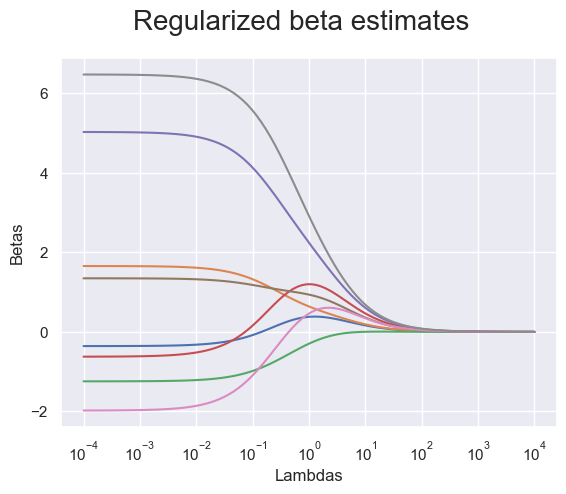

In [27]:
k = 100; # try k values of lambda
lambdas = np.logspace(-4, 4, k)

betas = np.zeros((p,k))
    
betas = ridgeMulti(X_pre, lambdas, p, y_pre)
    

    
plt.figure()
plt.semilogx(lambdas, betas)
plt.xlabel("Lambdas")
plt.ylabel("Betas")
plt.suptitle("Regularized beta estimates", fontsize=20)
plt.show()

What is a suitable range for $λ$ in which to search for an optimal solution?

<span style="color:yellow"> Probably around 10^-1 to 10^1

> (b) Select a suitable value for the regularization parameter using K-fold cross-validation. Plot the resulting optimal value of lambda on a plot of the parameter trace (i.e. a plot of the $\hat{β}_j$s as a function of $λ$).

>> (i) Try one of the common choices K = 5 and K = 10, and run the cross- validation a couple of times. Which would you prefer and why?
*Hint: To do Crossvalidation create a vector of length n that contains equal amounts of numbers from 1 to K and permute that vector.*

In [28]:
def centerData(data):
    
    mu = np.mean(data,axis=0)
    data = data - mu
    
    return data, mu

In [59]:
MSE.shape

(10,)

In [73]:
test_x.shape

(8, 10)

In [81]:
CV

array([75, 30, 40, 58, 15, 85, 70,  7, 47,  1, 48, 58, 89,  6, 16, 20, 49,
       60, 65,  8, 29,  3, 63, 97, 64, 47, 80, 11, 36, 86, 66,  4, 49, 38,
       20, 19, 78, 54, 45, 68, 81, 26, 64, 76, 39, 57, 65, 26, 13, 88,  5,
       37, 27, 35,  8, 90, 50, 12, 92, 46, 66, 48, 94, 44, 53, 89, 44, 52,
       17, 84,  2, 87, 60, 69, 25, 94, 22, 74, 33,  4, 51, 14, 78, 37, 91,
       50, 67, 54, 29, 56, 14, 32, 32, 23, 34, 23, 17])

In [86]:
(n/K)

9.7

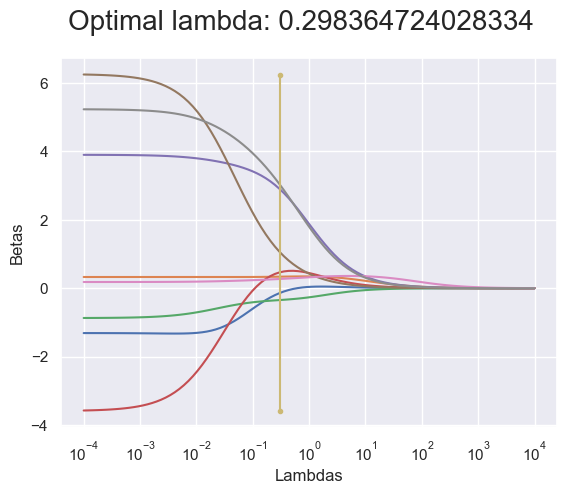

In [135]:
K = 10
lambdas = np.logspace(-4, 4, k)
MSE = np.zeros((K, k))

#Create a vector of length n that contains equal amounts of numbers from 1 to K
CV = np.array([np.arange(K) + 1] * int(np.ceil(n/K))).flatten()
#Permute that vector. 
CV = np.random.permutation(CV)[:n]

# For each chunk of data; run ridge for each lambda and calculate mean squared error
for i in range(1, K+1):
    train_x, mu_x = centerData(X[CV != i])
    train_y, mu_y = centerData(y[CV != i])
    
    test_x = X[CV == i] - mu_x
    test_y = y[CV == i] - mu_y
    
    normalizer = preproc.Normalizer().fit(train_x)  
    train_x = normalizer.transform(train_x)
    test_x = normalizer.transform(test_x)
    
    # print(train_x)
    betas = ridgeMulti(train_x, lambdas, p, train_y).T
    
    MSE[i-1, :] = np.mean((test_y[:,None] - test_x @ betas)**2, axis=0)

    

# average the mean squared error across chunks for the same lambda values to find the optimal lambda
best_lamda_idx = np.argmin(MSE.mean(axis=0))
lambda_OP = lambdas[best_lamda_idx]

# Remember excact solution depends on a random indexing, so results may vary
# I reuse the plot with all the betas from 1 a) and add a line for the optimal value of lambda
plt.figure()
plt.semilogx(lambdas, betas.T )
plt.xlabel("Lambdas")
plt.ylabel("Betas")
plt.suptitle(f"Optimal lambda: {lambda_OP}", fontsize=20)
plt.semilogx([lambda_OP, lambda_OP], [np.min(betas), np.max(betas)], marker = ".")
plt.show()

Where should you normalize your data?

(ii) What is the value of K corresponding to leave-one-out cross-validation?

<span style="color:yellow"> Data should be normalized for each fold by using mean and standardization of the training data. The value of K which corresponds to leave-one-out CV is n

> (c) Find a suitable value of $λ$ using the one-standard-error rule. What is the difference between the two strategies (cross-validation and cross-validation with one- standard-error-rule)?

CV lambda with 1-std-rule 1.32
-1.0235764244376975


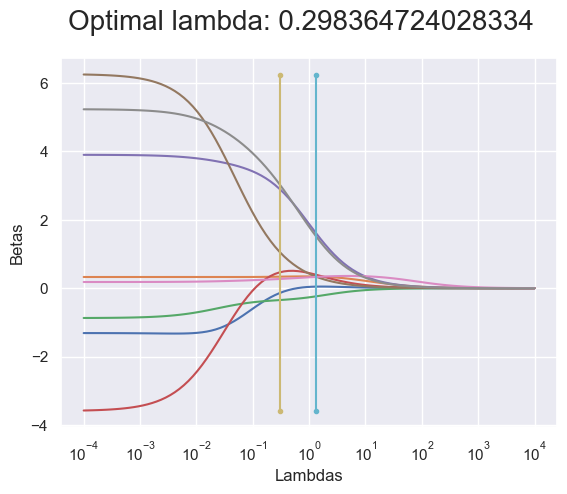

In [139]:
# Calculate the standard error for the best lambda, and find a the largest lambda with a MSE that is within
# the range of the optimal lambda +- the standard error.

SE = MSE.std(axis=0) / np.sqrt(K)
mus = MSE.mean(axis=0)

# Lambda_CV_1StdRule = lambdas[sum(mus < stds[best_lamda_idx] + mus[best_lamda_idx]) - 1]
Lambda_CV_1StdRule = lambdas[mus < SE[best_lamda_idx] + mus[best_lamda_idx]][-1]
print("CV lambda with 1-std-rule %0.2f" % Lambda_CV_1StdRule)

print(lambda_OP - Lambda_CV_1StdRule)
plt.figure()
plt.semilogx(lambdas, betas.T )
plt.xlabel("Lambdas")
plt.ylabel("Betas")
plt.suptitle(f"Optimal lambda: {lambda_OP}", fontsize=20)
plt.semilogx([lambda_OP, lambda_OP], [np.min(betas), np.max(betas)], marker = ".")
plt.semilogx([Lambda_CV_1StdRule, Lambda_CV_1StdRule], [np.min(betas), np.max(betas)], marker = ".")
plt.show()

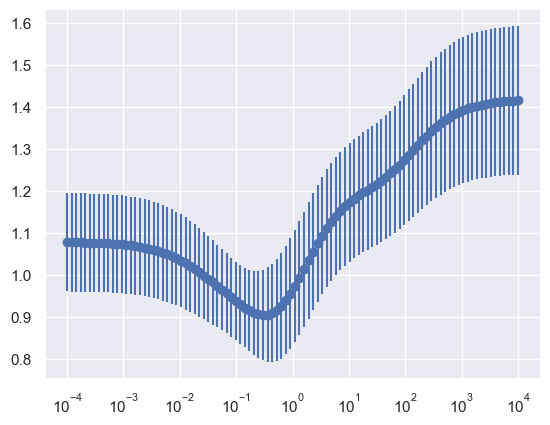

In [140]:
plt.xscale('log')
plt.scatter(lambdas, mus);
plt.errorbar(lambdas, mus, SE);

# plt.scatter(lambdas, mus + stds);
# plt.scatter(lambdas, mus - stds);

> (d) Select suitable values for the regularization parameter using the AIC and BIC criteria (cf. 7.5-7.7 in ESL). What are the advantages and disadvantages of using cross-validation vs. information criteria?

In [152]:
X.shape, Beta.shape

((97, 8), (1, 8))

In [160]:
N = len(y)
[n, p] = np.shape(X)

# off = np.ones(n)
# M = np.c_[off, X] # Include offset / intercept

# Linear solver
# beta, _, rnk, s = lng.lstsq(M, y)
# yhat = M @ beta

e = y - X @ betas[:, -1] # Low bias std
s = np.std(e)

D = np.zeros(100)
AIC = np.zeros(100)
BIC = np.zeros(100)

for j in range(100):
    Beta = ridgeMulti(train_x, [lambdas[j]], p, train_y).T
    inner = np.linalg.inv(np.matmul(X.T, X) + lambdas[j] * np.eye(p))
    outer = np.matmul(np.matmul(X, inner), X.T)
    D[j] = np.trace(outer)
    e = y - np.matmul(X, Beta)
    err = np.sum(e ** 2) / N
    AIC[j] = err + 2 * D[j] / N * s ** 2
    BIC[j] = N / (s ** 2) * (err + np.log(N) * D[j] / N * s ** 2)
    

# calculate the AIC and BIC for ridge regression for different lambdas
# pick the lambda based on the models with the lowest AIC and BIC

jAIC = np.argmin(AIC)
jBIC = np.argmin(BIC)

print("AIC at %0.2f" % jAIC)
print("BIC at %0.2f" % jBIC)

AIC at 88.00
BIC at 88.00


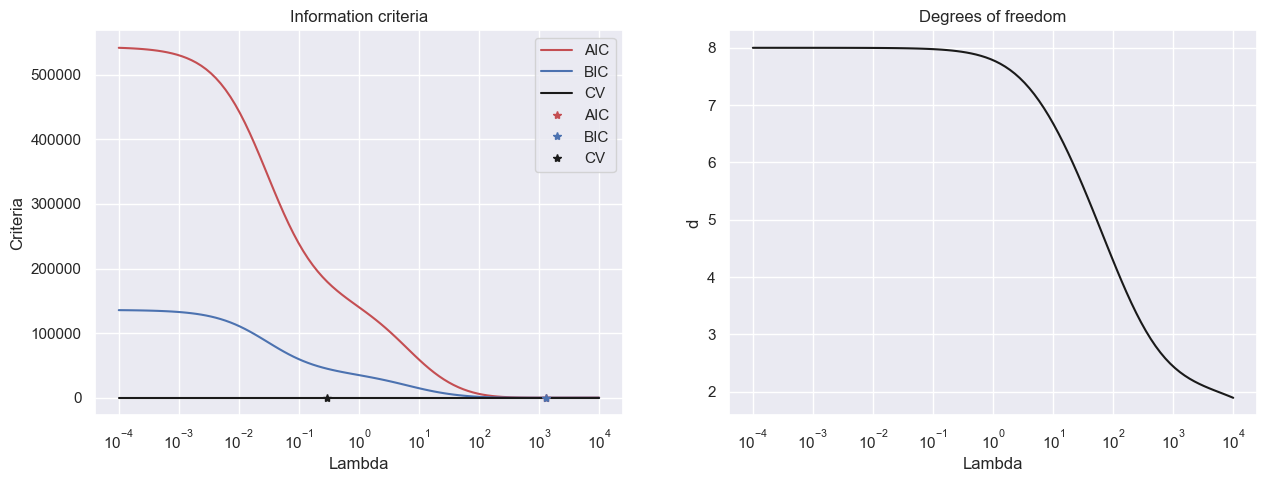

In [161]:
#plot different methods Information criteria: AIC BIC CV
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].set_title('Information criteria')
_ = axs[0].semilogx(lambdas,AIC,'-r',label='AIC')
axs[0].semilogx(lambdas,BIC/300,'-b',label='BIC')
axs[0].semilogx(lambdas,MSE.mean(axis=0),'-k',label='CV')
axs[0].semilogx(lambdas[jAIC],np.min(AIC),'*r',label='AIC')
axs[0].semilogx(lambdas[jBIC],np.min(BIC)/300,'*b',label='BIC')
axs[0].semilogx(lambdas[best_lamda_idx],np.min(MSE.mean(axis=0)),'*k',label='CV')
axs[0].legend()
axs[0].set_xlabel('Lambda')
axs[0].set_ylabel('Criteria')

#plot the degree of freedom
axs[1].semilogx(lambdas,D,'-k');
axs[1].set_title('Degrees of freedom');
axs[1].set_xlabel('Lambda');
axs[1].set_ylabel('d');

> (e) Use the bootstrap to estimate the variance of the parameters of the solution $(β)$ for each value of lambda in exercise 1a. Plot the variance estimates as a function of lambda. What do you notice?

Text(0.5, 0, 'lambda')

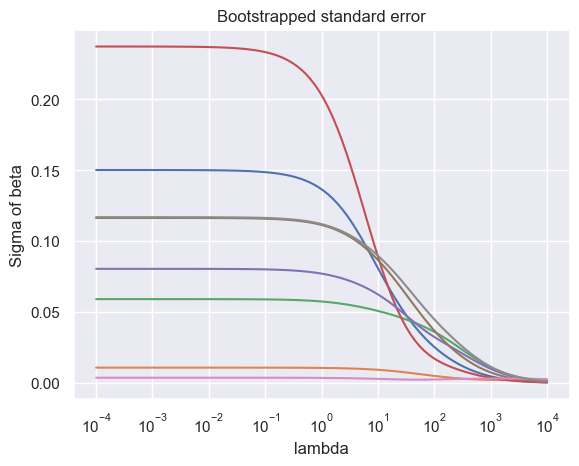

In [163]:

NBoot = 100
[N, p] = np.shape(X)
Beta = np.zeros((p, len(lambdas), NBoot))

for i in range(NBoot):
    I = np.random.randint(0, N, N)
    XBoot = X[I, :]
    yBoot = y[I]
    for j in range(100):
        Beta[:, j, i] = ridgeMulti(XBoot, [lambdas[j]], p, yBoot)

stdBeta = np.std(Beta, axis = 2)
plt.figure()
for i in range(8):
    plt.semilogx(lambdas, stdBeta[i,:])
plt.title("Bootstrapped standard error")
plt.ylabel("Sigma of beta")
plt.xlabel("lambda")